In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
path = '/content/gdrive/MyDrive/Colab Notebooks/Files/CreditPrediction.csv'

In [ ]:
import pandas as pd

data = pd.read_csv(path)
data.head()

,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 19
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,NaN
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,NaN
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,NaN
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,NaN
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10167 entries, 0 to 10166
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10167 non-null  int64  
 1   Customer_Age              10167 non-null  float64
 2   Gender                    9968 non-null   object 
 3   Dependent_count           10167 non-null  int64  
 4   Education_Level           10167 non-null  object 
 5   Marital_Status            8217 non-null   object 
 6   Income_Category           10167 non-null  object 
 7   Card_Category             8243 non-null   object 
 8   Months_on_book            9944 non-null   float64
 9   Total_Relationship_Count  10147 non-null  float64
 10  Months_Inactive_12_mon    10167 non-null  int64  
 11  Contacts_Count_12_mon     10167 non-null  int64  
 12  Credit_Limit              10167 non-null  float64
 13  Total_Revolving_Bal       10167 non-null  int64  
 14  Total_

In [ ]:
data.drop(['CLIENTNUM','Unnamed: 19'], axis=1, inplace=True)
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000


In [ ]:
data.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Customer_Age,10167.0,46.75,13.52,26.0,41.00,46.00,52.00,352.33
Dependent_count,10167.0,2.35,1.30,0.0,1.00,2.00,3.00,5.00
Months_on_book,9944.0,35.91,7.98,13.0,31.00,36.00,40.00,56.00
Total_Relationship_Count,10147.0,3.81,1.55,1.0,3.00,4.00,5.00,6.00
Months_Inactive_12_mon,10167.0,2.34,1.01,0.0,2.00,2.00,3.00,6.00
Contacts_Count_12_mon,10167.0,2.46,1.11,0.0,2.00,2.00,3.00,6.00
Credit_Limit,10167.0,8632.55,9087.33,1438.3,2556.50,4549.00,11067.50,34516.00
Total_Revolving_Bal,10167.0,1162.18,815.08,0.0,348.50,1276.00,1783.00,2517.00
Total_Amt_Chng_Q4_Q1,10167.0,0.76,0.22,0.0,0.63,0.74,0.86,3.40
Total_Trans_Amt,10167.0,4402.35,3393.95,510.0,2155.50,3900.00,4740.00,18484.00


In [ ]:
# Define thresholds based on the given summary statistics
threshold_inactive_months = 3
threshold_transaction_count = 45
threshold_transaction_amount = 2155.50

# Define the 'Churn' column based on the thresholds
data['Churn'] = ((data['Months_Inactive_12_mon'] > threshold_inactive_months) |
                 (data['Total_Trans_Ct'] < threshold_transaction_count) |
                 (data['Total_Trans_Amt'] < threshold_transaction_amount)).astype(int)

# Check the distribution of the new target variable
print(data['Churn'].value_counts())


Churn
0    6635
1    3532
Name: count, dtype: int64


In [ ]:
data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061,1
1,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105,1
2,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000,1
3,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,1
4,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000,1


In [ ]:
observations_count = data.count()
missing_values = data.isnull().sum()
cardinality = data.nunique()

results = pd.DataFrame({
    'Observations_Count': observations_count,
    'Cardinality': cardinality,
    'Missing_Values': missing_values
})

print(results)

                          Observations_Count  Cardinality  Missing_Values
Customer_Age                           10167           62               0
Gender                                  9968            2             199
Dependent_count                        10167            6               0
Education_Level                        10167            7               0
Marital_Status                          8217            4            1950
Income_Category                        10167            6               0
Card_Category                           8243            4            1924
Months_on_book                          9944           44             223
Total_Relationship_Count               10147            6              20
Months_Inactive_12_mon                 10167            7               0
Contacts_Count_12_mon                  10167            7               0
Credit_Limit                           10167         6205               0
Total_Revolving_Bal                   

In [ ]:
# Define a function to calculate multiple modes, their frequencies, and percentages
def calculate_multiple_mode_stats(column):
    mode_counts = data[column].value_counts()  # Count the occurrences of each unique value in the column
    modes = mode_counts.index.tolist()  # Get the list of modes (unique values sorted by frequency)
    frequencies = mode_counts.values.tolist()  # Get the list of frequencies corresponding to each mode
    percentages = [(freq / len(data)) * 100 for freq in frequencies]  # Calculate the percentage for each mode

    result = []  # Initialize an empty list to store the results
    for i in range(len(modes)):  # Loop through the modes
        result.append({
            'Mode': modes[i],  # Add the mode
            'Frequency': frequencies[i],  # Add the frequency of the mode
            'Percentage': percentages[i]  # Add the percentage of the mode
        })

    return result  # Return the result list

# Calculate for 'Gender'
Gender_stats = calculate_multiple_mode_stats('Gender')  # Calculate the stats for the 'Gender' column
print("Gender")
for stat in Gender_stats:  # Loop through the stats
    print(f"Mode: {stat['Mode']}, Frequency: {stat['Frequency']}, Percentage: {stat['Percentage']:.2f}%")  # Print the stats

# Calculate for 'Education_Level'
Education_Level_stats = calculate_multiple_mode_stats('Education_Level')  # Calculate the stats for the 'Education_Level' column
print("\nEducation_Level")
for stat in Education_Level_stats:  # Loop through the stats
    print(f"Mode: {stat['Mode']}, Frequency: {stat['Frequency']}, Percentage: {stat['Percentage']:.2f}%")  # Print the stats

# Calculate for 'Marital_Status'
Marital_Status_stats = calculate_multiple_mode_stats('Marital_Status')  # Calculate the stats for the 'Marital_Status' column
print("\nMarital_Status")
for stat in Marital_Status_stats:  # Loop through the stats
    print(f"Mode: {stat['Mode']}, Frequency: {stat['Frequency']}, Percentage: {stat['Percentage']:.2f}%")  # Print the stats

# Calculate for 'Card_Category'
Card_Category_stats = calculate_multiple_mode_stats('Card_Category')  # Calculate the stats for the 'Card_Category' column
print("\nCard_Category")
for stat in Card_Category_stats:  # Loop through the stats
    print(f"Mode: {stat['Mode']}, Frequency: {stat['Frequency']}, Percentage: {stat['Percentage']:.2f}%")  # Print the stats

Gender
Mode: F, Frequency: 5265, Percentage: 51.79%
Mode: M, Frequency: 4703, Percentage: 46.26%

Education_Level
Mode: Graduate, Frequency: 3141, Percentage: 30.89%
Mode: High School, Frequency: 2024, Percentage: 19.91%
Mode: Unknown, Frequency: 1522, Percentage: 14.97%
Mode: Uneducated, Frequency: 1490, Percentage: 14.66%
Mode: College, Frequency: 1020, Percentage: 10.03%
Mode: Post-Graduate, Frequency: 518, Percentage: 5.09%
Mode: Doctorate, Frequency: 452, Percentage: 4.45%

Marital_Status
Mode: Married, Frequency: 3808, Percentage: 37.45%
Mode: Single, Frequency: 3192, Percentage: 31.40%
Mode: Unknown, Frequency: 621, Percentage: 6.11%
Mode: Divorced, Frequency: 596, Percentage: 5.86%

Card_Category
Mode: Blue, Frequency: 7666, Percentage: 75.40%
Mode: Silver, Frequency: 464, Percentage: 4.56%
Mode: Gold, Frequency: 97, Percentage: 0.95%
Mode: Platinum, Frequency: 16, Percentage: 0.16%


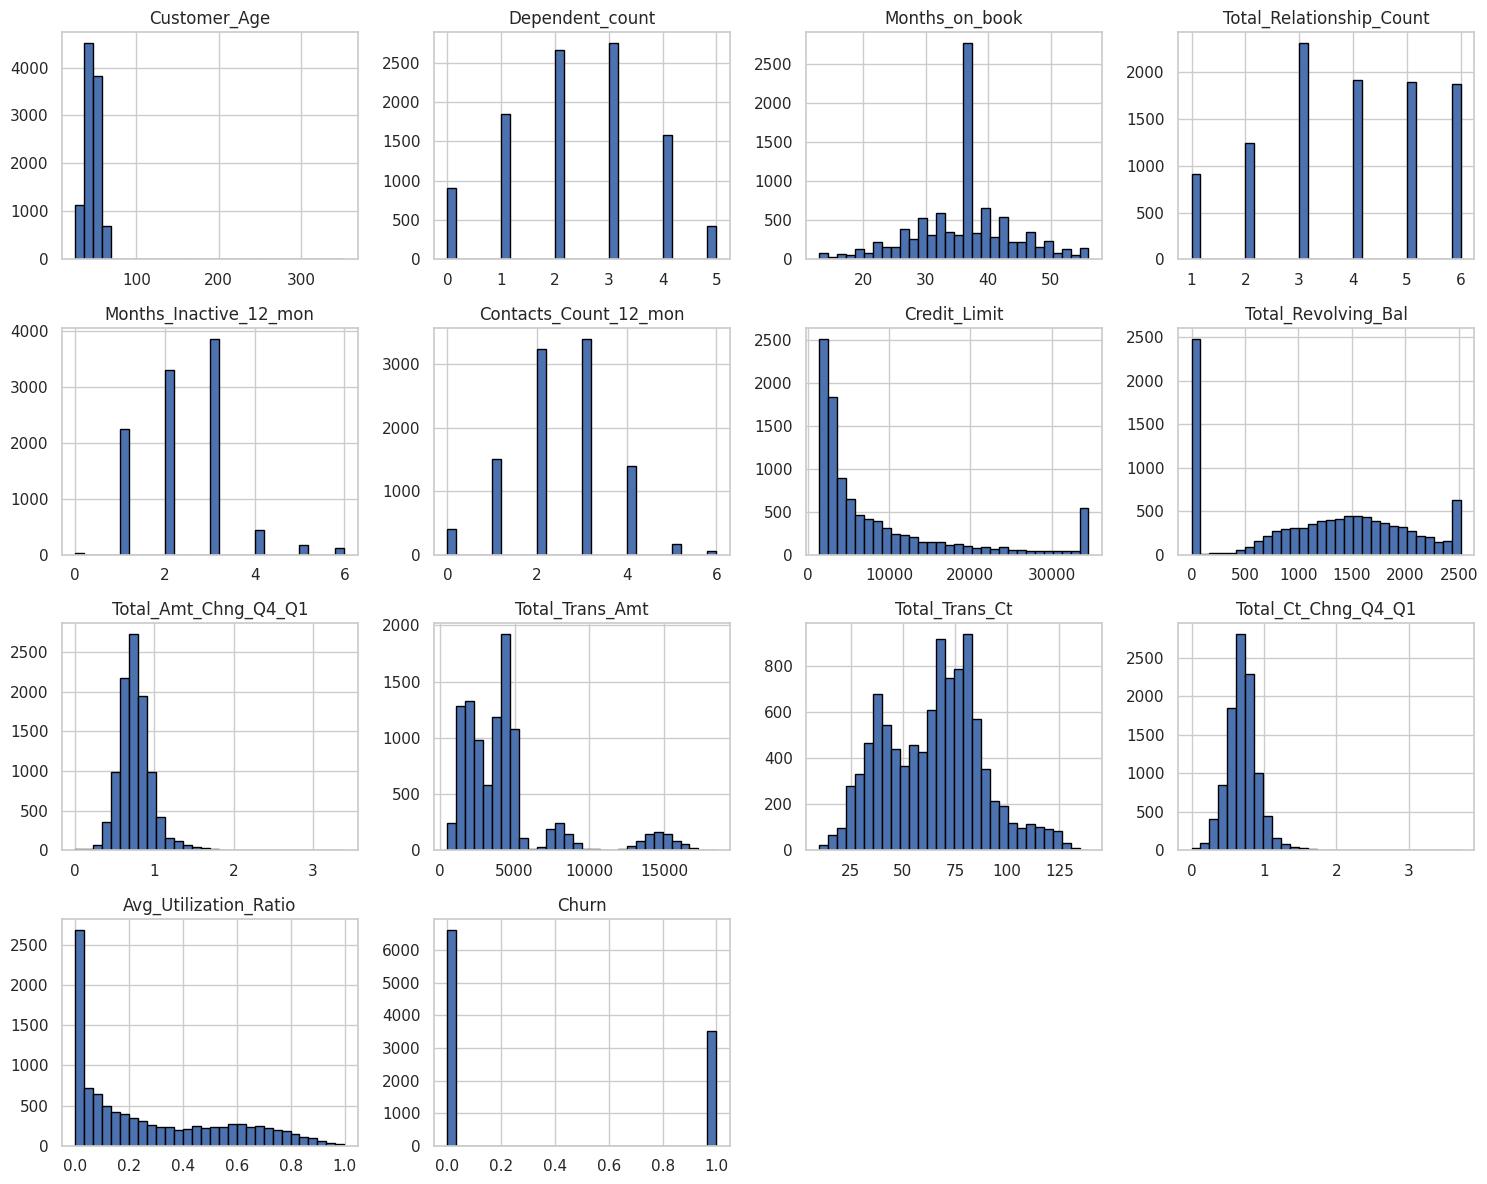

In [ ]:
import matplotlib.pyplot as plt

# Set up the figure
data.hist(bins=30, figsize=(15, 12), edgecolor='black')
plt.tight_layout()
plt.show()


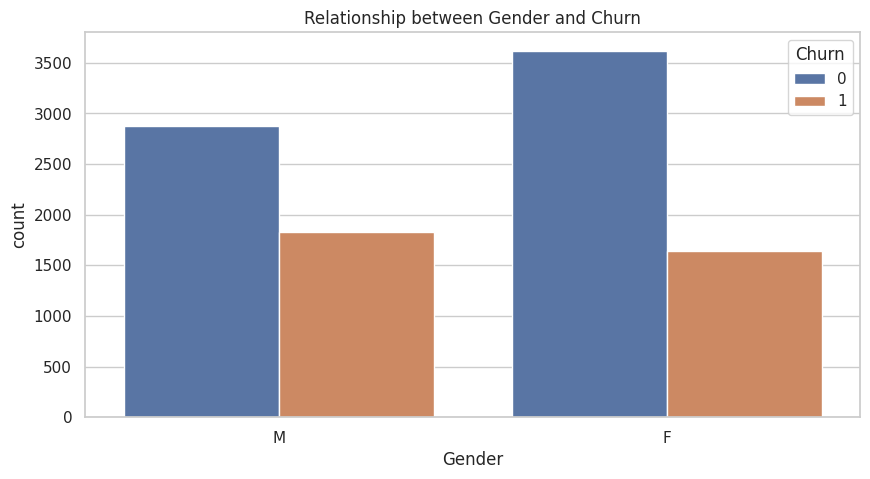

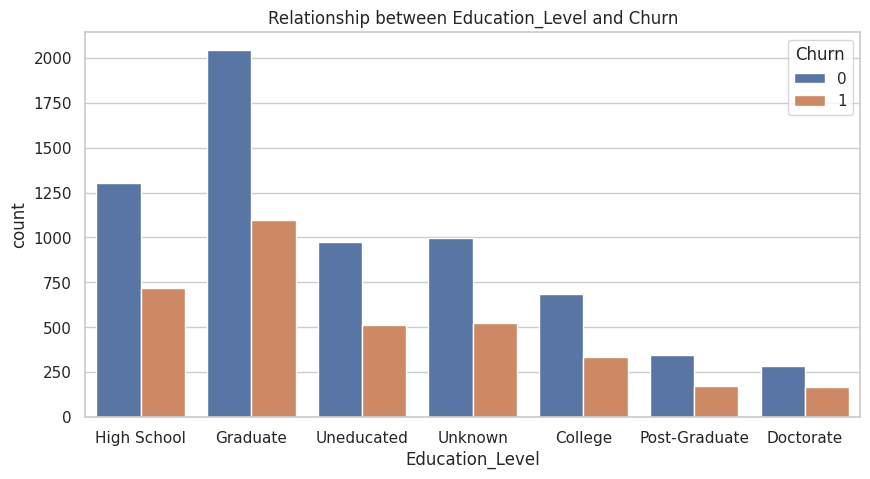

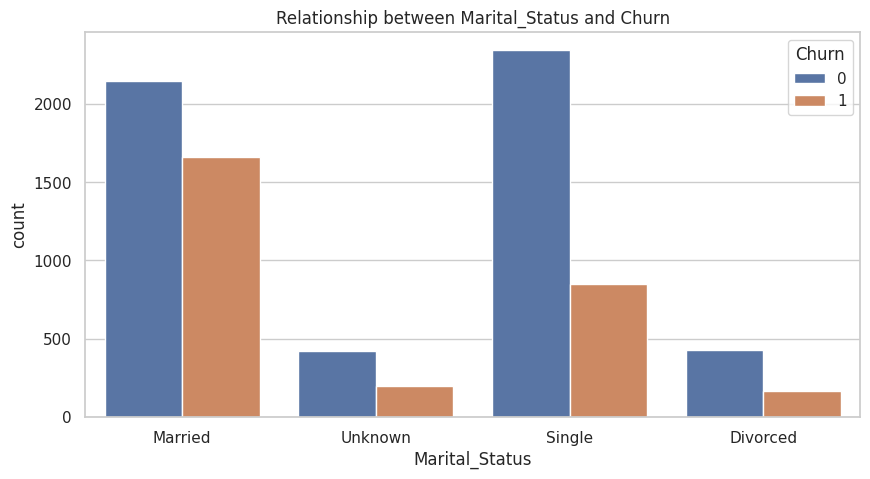

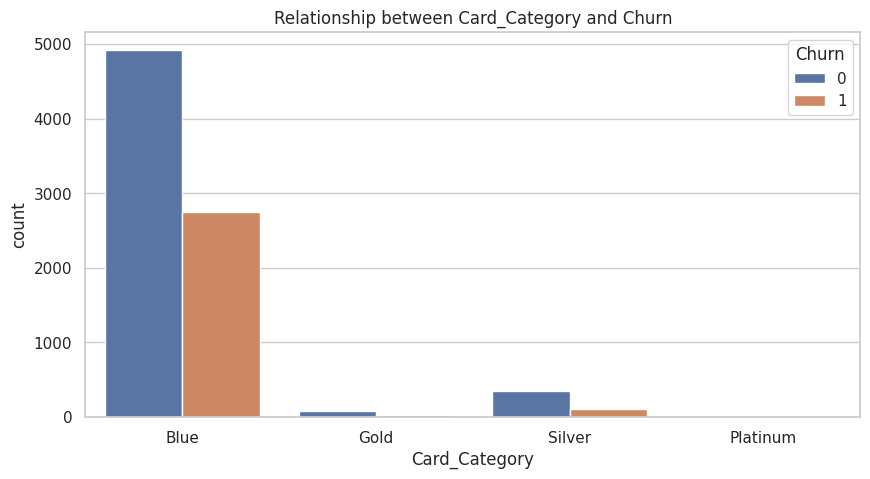

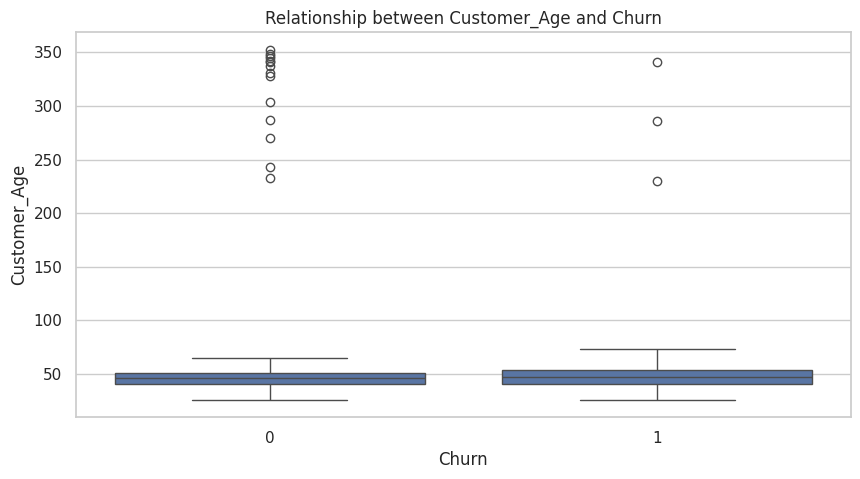

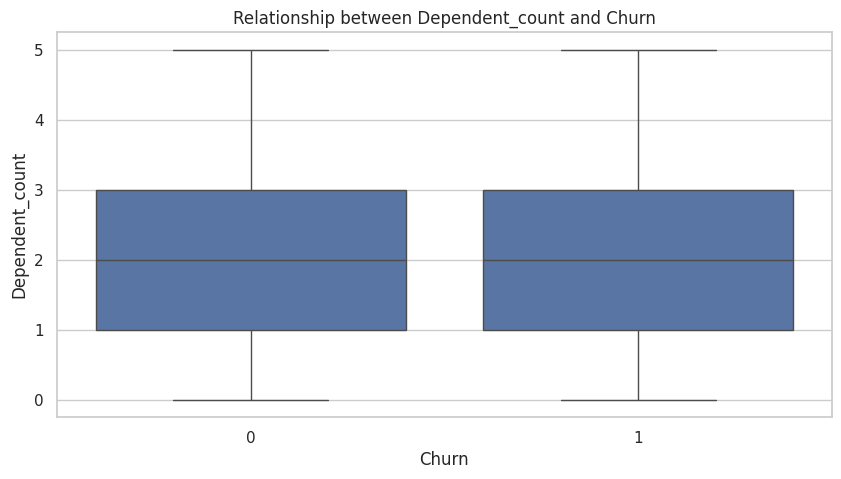

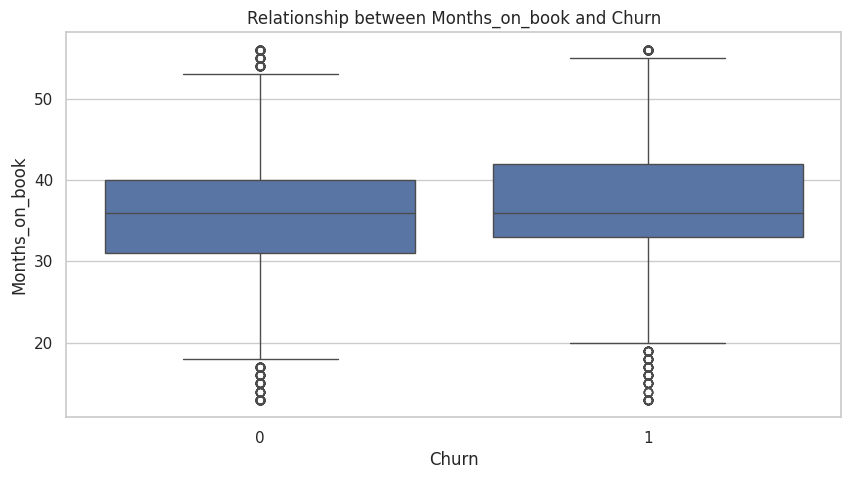

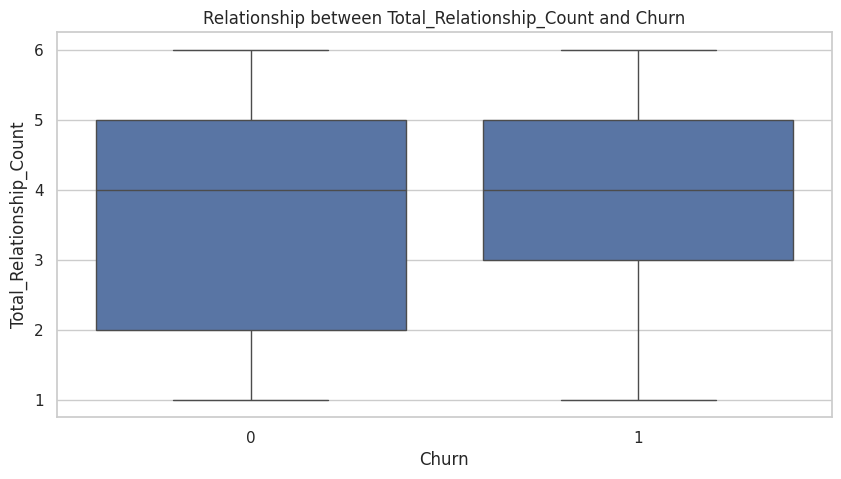

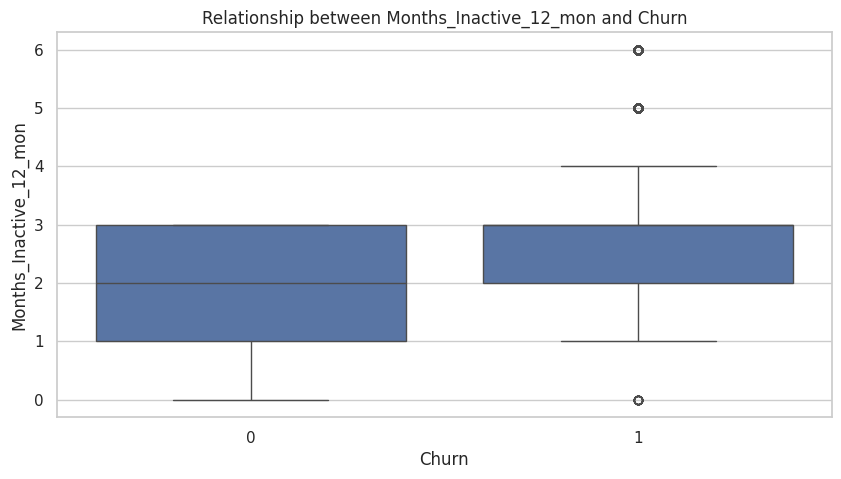

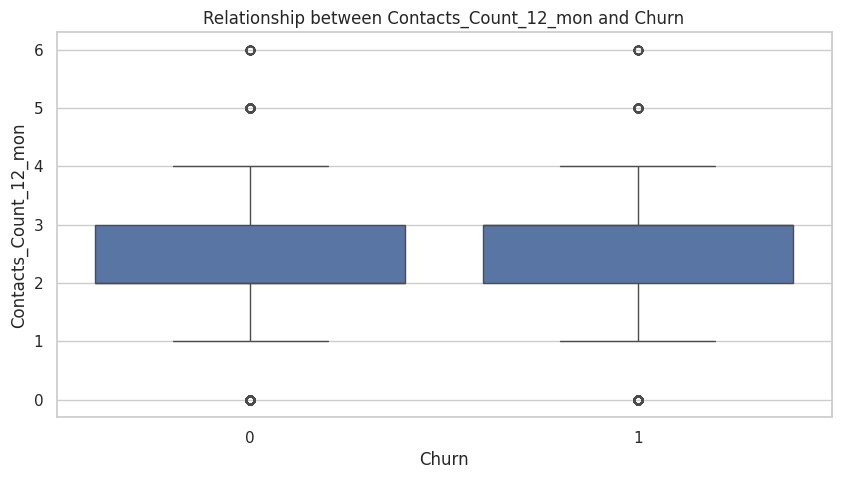

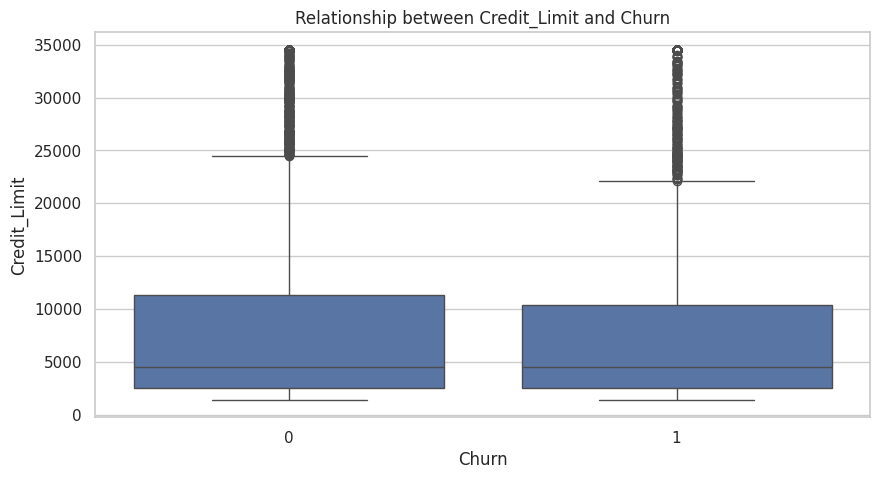

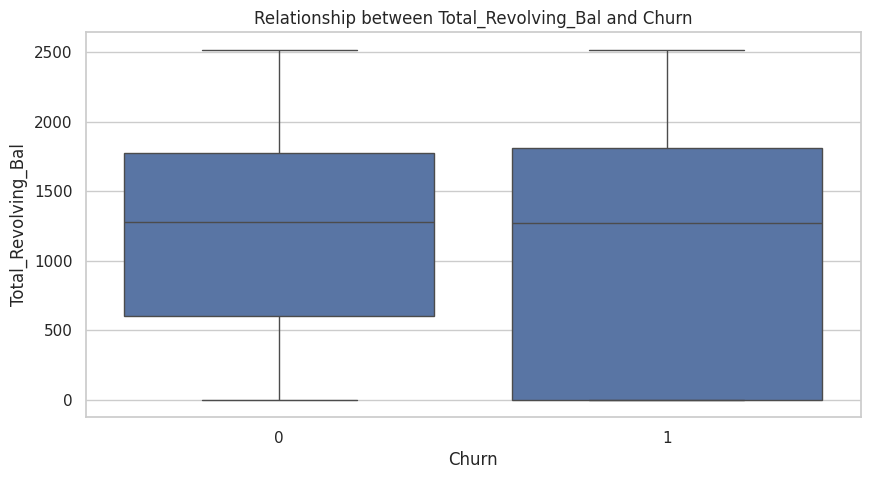

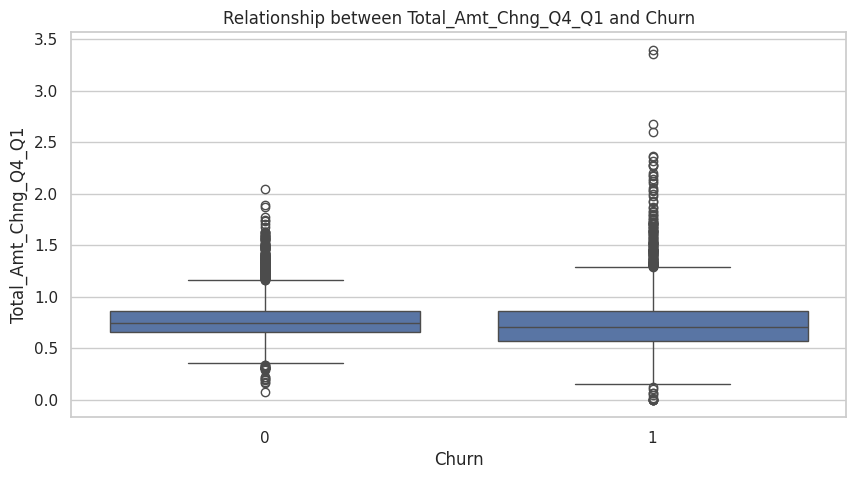

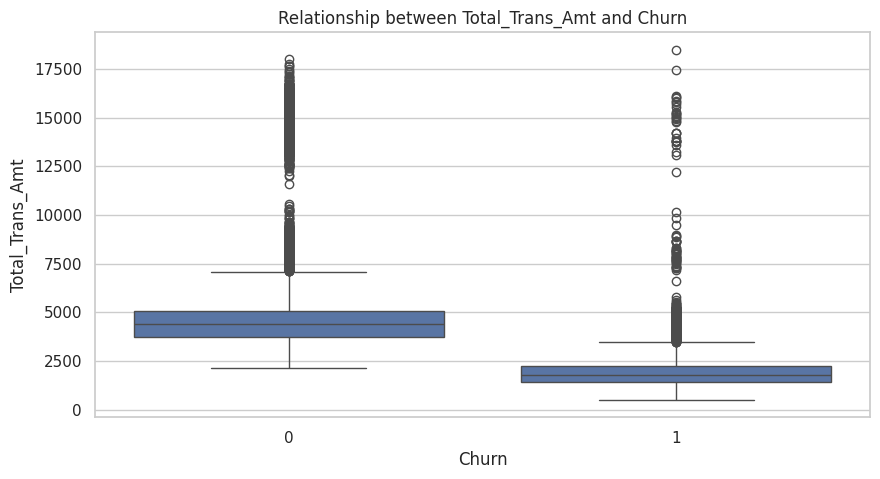

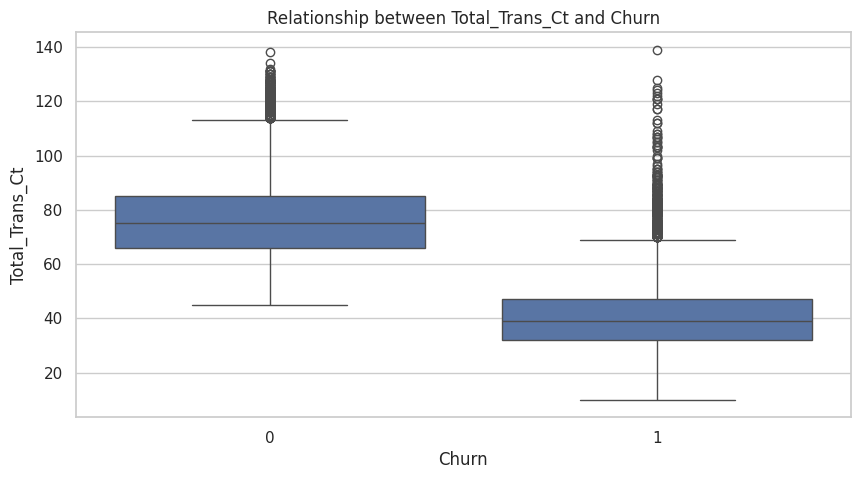

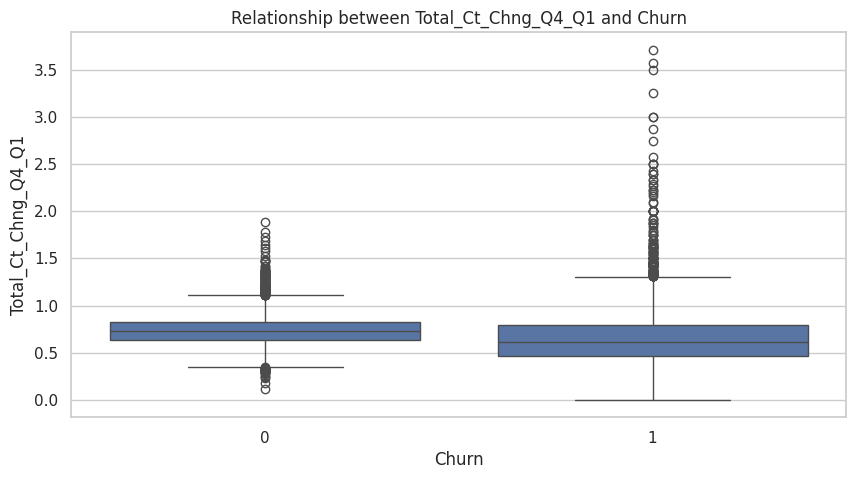

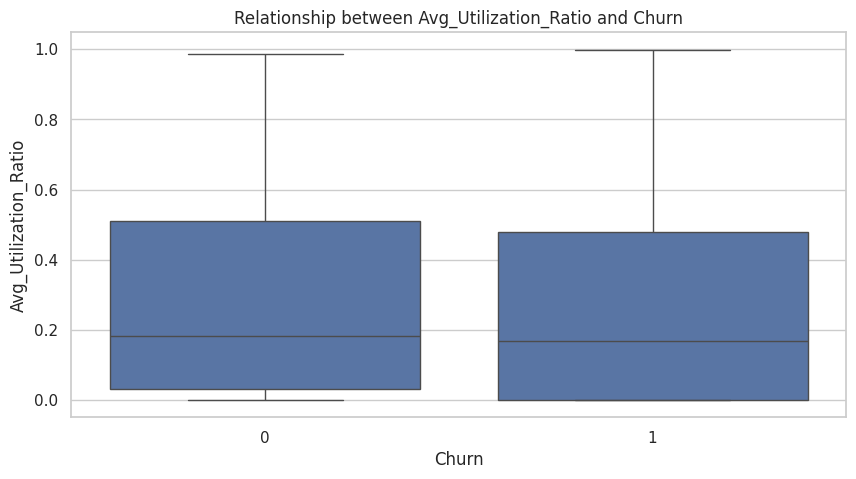

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Churn column to categorical if it's not already
data['Churn'] = data['Churn'].astype('category')

# Set plot aesthetics
sns.set(style="whitegrid")

# Define categorical and numerical features
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Card_Category']
numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                      'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
                      'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
                      'Avg_Utilization_Ratio']


# Plot relationships between categorical features and Churn
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data, x=feature, hue='Churn')
    plt.title(f'Relationship between {feature} and Churn')
    plt.show()

# Plot relationships between numerical features and Churn
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=data, x='Churn', y=feature)
    plt.title(f'Relationship between {feature} and Churn')
    plt.show()


In [ ]:

import numpy as np

# Identify and handle missing values
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before handling:\n", missing_values)

# Impute missing values for categorical columns with the mode
categorical_cols = ['Gender', 'Marital_Status', 'Card_Category']
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Impute missing values for numerical columns with the median
numerical_cols = ['Months_on_book', 'Total_Relationship_Count']
for col in numerical_cols:
    data[col].fillna(data[col].median(), inplace=True)

# Check for duplicates and remove if any
data.drop_duplicates(inplace=True)

# Recheck for missing values
missing_values_after = data.isnull().sum()
print("Missing values after handling:\n", missing_values_after)


Missing values before handling:
 Customer_Age                   0
Gender                       199
Dependent_count                0
Education_Level                0
Marital_Status              1950
Income_Category                0
Card_Category               1924
Months_on_book               223
Total_Relationship_Count      20
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
Churn                          0
dtype: int64
Missing values after handling:
 Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon   

<ipython-input-128-23d676b689a2>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
<ipython-input-128-23d676b689a2>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [ ]:
num_rows_after = data.shape[0]

In [ ]:
# Function to remove outliers based on IQR (Reconsider the IQR Thresholds from 1.5 to 2 to cover more outliers)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 2 * IQR
    upper_bound = Q3 + 2 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply the function to each numeric column in the DataFrame
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data = remove_outliers_iqr(data, column)

# Get the number of rows in the dataset after removing outliers
num_rows_after = data.shape[0]

# Print the number of rows after removing outliers
print(f'The number of rows in the dataset after removing outliers is: {num_rows_after}')


The number of rows in the dataset after removing outliers is: 8142


In [ ]:
# Define the grouping function
def categorize_education(level):
    higher_education = ['Doctorate', 'Graduate', 'Post-Graduate']
    if level in higher_education:
        return 'Higher Education'
    else:
        return 'No Higher Education'

# Apply the function to the Education_Level column to replace its values
data['Education_Level'] = data['Education_Level'].apply(categorize_education)

data.head()


,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
10,42.0,M,5,No Higher Education,Unknown,$120K +,Blue,31.0,5.0,3,2,6748.0,1467,0.831,1201,42,0.680,0.217,1
14,57.0,F,2,Higher Education,Married,Less than $40K,Blue,48.0,5.0,2,2,2436.0,680,1.190,1570,29,0.611,0.279,1
19,45.0,F,2,Higher Education,Married,Unknown,Blue,37.0,6.0,1,2,14470.0,1157,0.966,1207,21,0.909,0.080,1
20,47.0,M,1,Higher Education,Divorced,$60K - $80K,Blue,42.0,5.0,2,0,20979.0,1800,0.906,1178,27,0.929,0.086,1
21,62.0,F,0,Higher Education,Married,Less than $40K,Blue,49.0,2.0,3,3,1438.3,0,1.047,692,16,0.600,0.000,1


In [ ]:
# Convert categorical variables into numerical representations

# One-Hot Encoding for categorical features with multiple categories
categorical_features = ['Income_Category', 'Card_Category']
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Label Encoding for binary categorical features
binary_categorical_features = ['Gender', 'Marital_Status', 'Education_Level']
label_encoders = {}
# Added import for LabelEncoder
from sklearn.preprocessing import LabelEncoder

for col in binary_categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

data.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Avg_Utilization_Ratio,Churn,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
10,42.0,1,5,1,3,31.0,5.0,3,2,6748.0,...,0.217,1,False,False,False,False,False,False,False,False
14,57.0,0,2,0,1,48.0,5.0,2,2,2436.0,...,0.279,1,False,False,False,True,False,False,False,False
19,45.0,0,2,0,1,37.0,6.0,1,2,14470.0,...,0.080,1,False,False,False,False,True,False,False,False
20,47.0,1,1,0,0,42.0,5.0,2,0,20979.0,...,0.086,1,False,True,False,False,False,False,False,False
21,62.0,0,0,0,1,49.0,2.0,3,3,1438.3,...,0.000,1,False,False,False,True,False,False,False,False


In [ ]:
# Calculate the correlation matrix between each of the input variable wioth the tarbget variable
corr_matrix = data.corr()

# Extract correlation with the target variable 'Churn'
corr_with_target = corr_matrix['Churn'].sort_values(ascending=False)

# Print the sorted correlations
print(corr_with_target)

Churn                             1.000000
Months_Inactive_12_mon            0.227318
Gender                            0.108242
Contacts_Count_12_mon             0.097821
Customer_Age                      0.085634
Months_on_book                    0.082969
Income_Category_$80K - $120K      0.067191
Total_Relationship_Count          0.066180
Income_Category_$60K - $80K       0.037224
Credit_Limit                      0.031023
Card_Category_Platinum           -0.000862
Income_Category_$40K - $60K      -0.006876
Education_Level                  -0.011540
Total_Revolving_Bal              -0.011745
Card_Category_Gold               -0.012406
Card_Category_Silver             -0.032892
Income_Category_Unknown          -0.037933
Dependent_count                  -0.052615
Avg_Utilization_Ratio            -0.053014
Income_Category_Less than $40K   -0.059101
Marital_Status                   -0.088619
Total_Amt_Chng_Q4_Q1             -0.154889
Total_Ct_Chng_Q4_Q1              -0.279261
Total_Trans

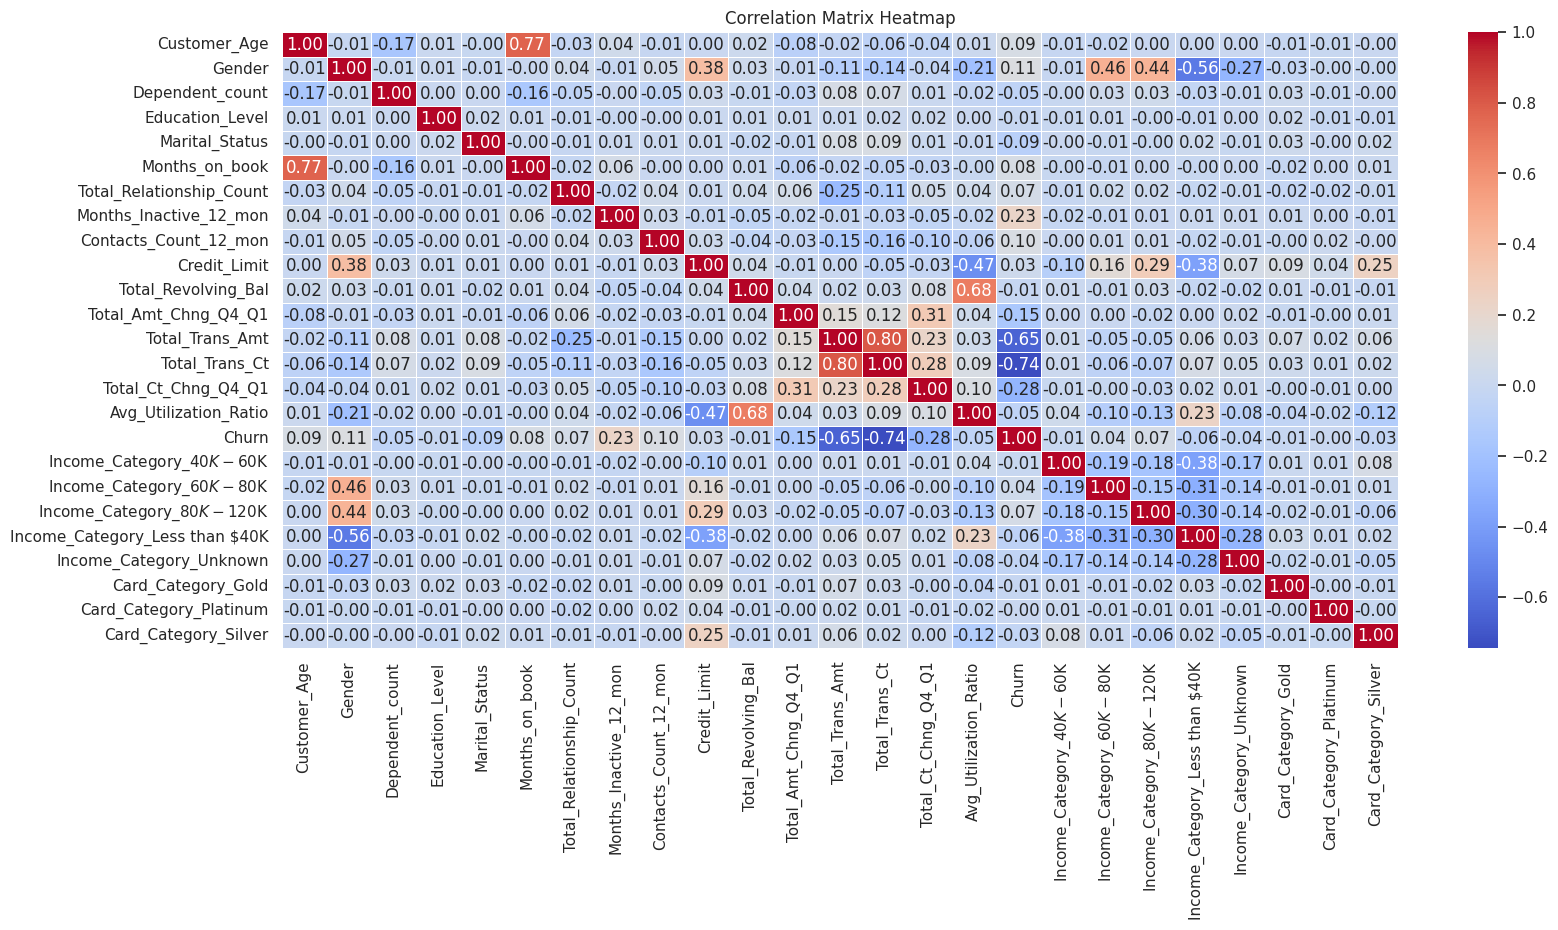

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(18, 8))  # Optional: adjust the size of the heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()
plt.show()

In [ ]:
# Normalize numerical features

# Identify numerical features
numerical_features = [
    'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
    'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
    'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
    'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'
]

# Import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Convert boolean to int (0 or 1)
bool_columns = data.select_dtypes(include=['bool']).columns
data[bool_columns] = data[bool_columns].astype(int)

# Save the DataFrame to a new CSV file ready for machine learning algorithms
data.to_csv('processed_CreditPrediction.csv', index=False)

# Display the first few rows of the processed data
print(data.head())


    Customer_Age  Gender  Dependent_count  Education_Level  Marital_Status  \
10      0.363636       1              1.0                1               3   
14      0.704545       0              0.4                0               1   
19      0.431818       0              0.4                0               1   
20      0.477273       1              0.2                0               0   
21      0.818182       0              0.0                0               1   

    Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
10           0.375                       0.8                     0.6   
14           0.800                       0.8                     0.4   
19           0.525                       1.0                     0.2   
20           0.650                       0.8                     0.4   
21           0.825                       0.2                     0.6   

    Contacts_Count_12_mon  Credit_Limit  ...  Avg_Utilization_Ratio  Churn  \
10                  